In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#IMPORTING DATA AND DATA PREPARATION


In [3]:
data = pd.read_csv("/content/Electric_Production.csv")
data.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
data['DATE'] = pd.to_datetime(data['DATE'])
data

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [5]:
data.set_index('DATE',inplace = True)
data

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


#Visualization

<Axes: xlabel='DATE'>

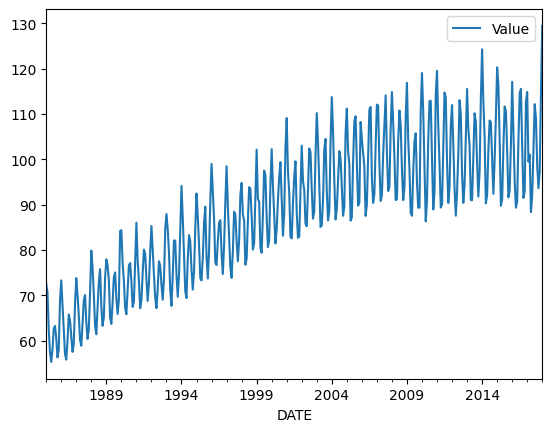

In [6]:
data.plot()

In [7]:
# Convert Seasonal data to stationary
from statsmodels.tsa.stattools import adfuller

In [8]:
#H0 : Data is not stationary
#H1 : Data is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test statistic' , 'p-value' , '#Lags used' ,'Number of observations used']
  for value, label in zip(result, labels):
    print(label + ' : ' + str(value))
  # print(result[1])
  if result[1] <= 0.05:
    print("reject the null hypothesis DATA IS STATIONARY")
  else:
    print("Accept Null hypothessis DATA IS NOT STATIONARY")

In [9]:
adfuller_test(data['Value'])

ADF Test statistic : -2.256990350047235
p-value : 0.1862146911658712
#Lags used : 15
Number of observations used : 381
Accept Null hypothessis DATA IS NOT STATIONARY


In [10]:
data['VFD'] = data['Value'] - data['Value'].shift(12)  #12 becoz a year has 12 months and seasonal data means it repeats every 12 months
data

,Value,VFD
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN
...,...,...
2017-09-01,98.6154,-4.1483
2017-10-01,93.6137,2.1270
2017-11-01,97.3359,4.4459


In [11]:
adfuller_test(data['VFD'].dropna())

ADF Test statistic : -5.673482023381762
p-value : 8.812644938088861e-07
#Lags used : 12
Number of observations used : 372
reject the null hypothesis DATA IS STATIONARY


<Axes: xlabel='DATE'>

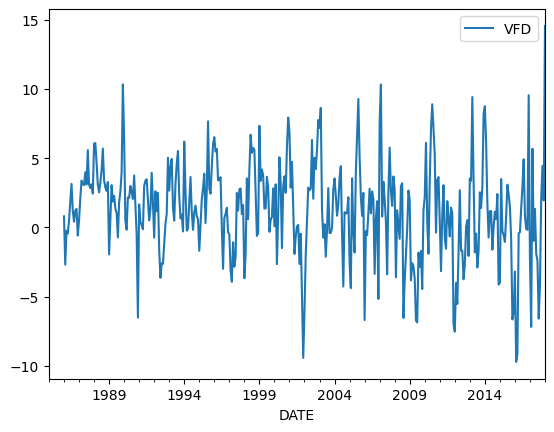

In [12]:
data.plot(y='VFD')

In [13]:
def Create_Features(df):
    """
        Create some features from the date of the data
    """
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    df['DayOfWeek'] = df.index.dayofweek
    df['DayOfYear'] = df.index.dayofyear
    df['Hour'] = df.index.hour
    df['Minute'] = df.index.minute
    df['Second'] = df.index.second
    df['Quarter'] = df.index.quarter
    df['IsLeapYear'] = df.index.is_leap_year
    df['IsLeapYear'] = df["IsLeapYear"].astype(int)
    return df

In [14]:
data = Create_Features(data)
data

,Value,VFD,Year,Month,Day,DayOfWeek,DayOfYear,Hour,Minute,Second,Quarter,IsLeapYear
DATE,,,,,,,,,,,,
1985-01-01,72.5052,NaN,1985,1,1,1,1,0,0,0,1,0
1985-02-01,70.6720,NaN,1985,2,1,4,32,0,0,0,1,0
1985-03-01,62.4502,NaN,1985,3,1,4,60,0,0,0,1,0
1985-04-01,57.4714,NaN,1985,4,1,0,91,0,0,0,2,0
1985-05-01,55.3151,NaN,1985,5,1,2,121,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,98.6154,-4.1483,2017,9,1,4,244,0,0,0,3,0
2017-10-01,93.6137,2.1270,2017,10,1,6,274,0,0,0,4,0
2017-11-01,97.3359,4.4459,2017,11,1,2,305,0,0,0,4,0


#ARIMA VALUES FOR p d q


In [15]:
Features = ["Year" , "Month" , "DayOfYear" , "Hour" ,
            "Minute" , "Second" , "Quarter" , "IsLeapYear"]

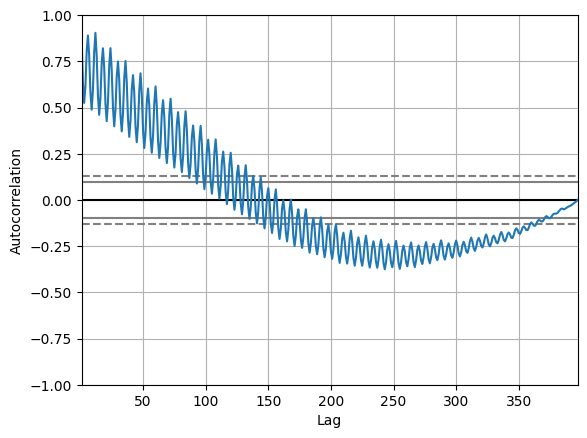

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Value'])
plt.show()

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.4 MB/s eta 0:00:00


In [17]:
from pmdarima.arima import auto_arima
arima = auto_arima(data['VFD'].dropna(), stepwise = False , seasonal = True, exogenous=data[Features])
arima

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [18]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data['Value'], order = (5,1,0), seasonal_order = (5,1,0,12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

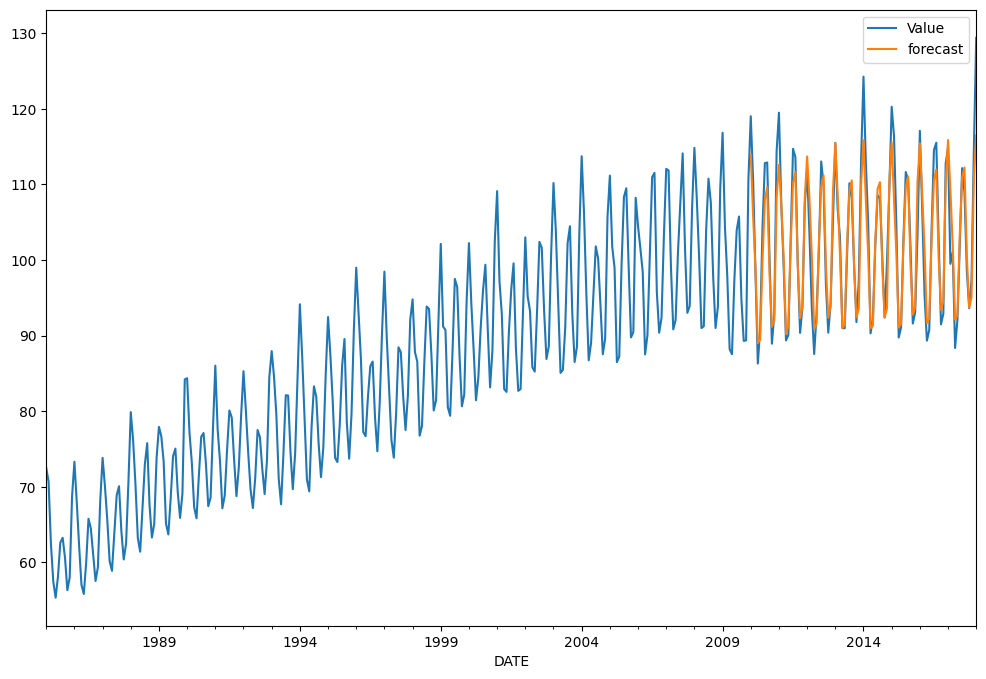

In [19]:
data['forecast'] = results.predict(start=300, end = 396, dynamic = True)
data[['Value','forecast']].plot(figsize=(12,8))

#FORECASTING FUTURE

In [20]:
from pandas.tseries.offsets import DateOffset
future_dates = [data.index[-1] + DateOffset(months = x) for x in range(0,60)]

In [21]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = data.columns)
future_dates_df

,Value,VFD,Year,Month,Day,DayOfWeek,DayOfYear,Hour,Minute,Second,Quarter,IsLeapYear,forecast
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
future_dates_df = Create_Features(future_dates_df)
future_dates_df
future_df = pd.concat([data,future_dates_df])


In [23]:
future_df.shape

(456, 13)

<Axes: >

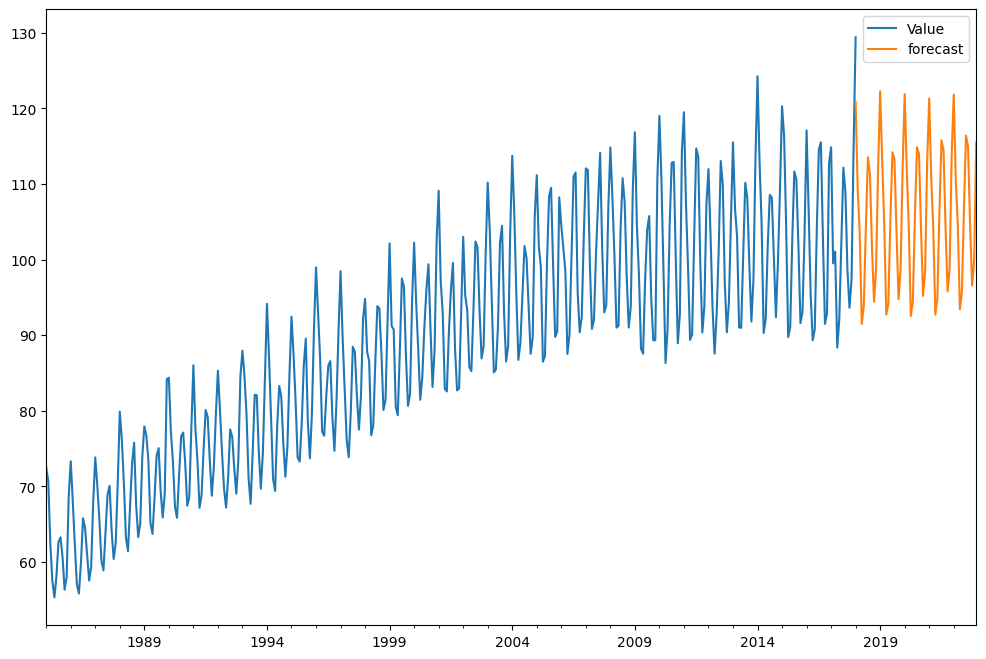

In [24]:
future_df['forecast'] = results.predict(start=396, end = 456, dynamic = True)
future_df[['Value','forecast']].plot(figsize=(12,8))